In [1]:
# 1. Imports and Setup
import os
import sys

# Ensure the src directory is in the Python path


sys.path.append(os.path.abspath(".."))
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.forecasting_analysis import (
    generate_arima_forecast,
    generate_lstm_forecast,
    plot_forecast_results,
    interpret_forecast_results
)
from pmdarima.arima import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Define parameters (must match Task 2)
ticker_to_predict = "TSLA"
split_date = "2023-01-01"
forecast_steps = 252 # Approximately 1 year of trading days


In [2]:
# --- 2. Data Loading ---
print("--- 2. Loading Data ---")
merged_df = pd.read_csv("../data/processed/merged_prices.csv", index_col=0, parse_dates=True)
tsla_prices = merged_df[ticker_to_predict].to_frame()
train_data = tsla_prices[tsla_prices.index < split_date]
test_data = tsla_prices[tsla_prices.index >= split_date]
print("Data loaded successfully.\n")

--- 2. Loading Data ---
Data loaded successfully.



In [5]:
# --- 3. Model Training (re-training from Task 2) ---
print("--- 3. Re-training Best Model ---")
# Assuming ARIMA was the best model for this analysis due to confidence intervals
arima_model = ARIMA(train_data[ticker_to_predict], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
results = arima_model.fit()
print("ARIMA model re-trained successfully.\n")

--- 3. Re-training Best Model ---


d:\week-11\gmf-time-series-portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\week-11\gmf-time-series-portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\week-11\gmf-time-series-portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model re-trained successfully.



In [7]:
# --- 4. Generate Forecast ---
print("--- 4. Generating Forecast ---")
arima_forecast, confidence_interval = generate_arima_forecast(results, steps=forecast_steps)

# Align the forecast index to future dates
last_train_date = train_data.index[-1]
forecast_index = pd.date_range(start=last_train_date + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
arima_forecast.index = forecast_index
confidence_interval.index = forecast_index
print("Forecast generated.\n")

--- 4. Generating Forecast ---
Generating ARIMA forecast for 252 steps...
Forecast generated.



d:\week-11\gmf-time-series-portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\week-11\gmf-time-series-portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


--- 5. Visualizing Forecast ---


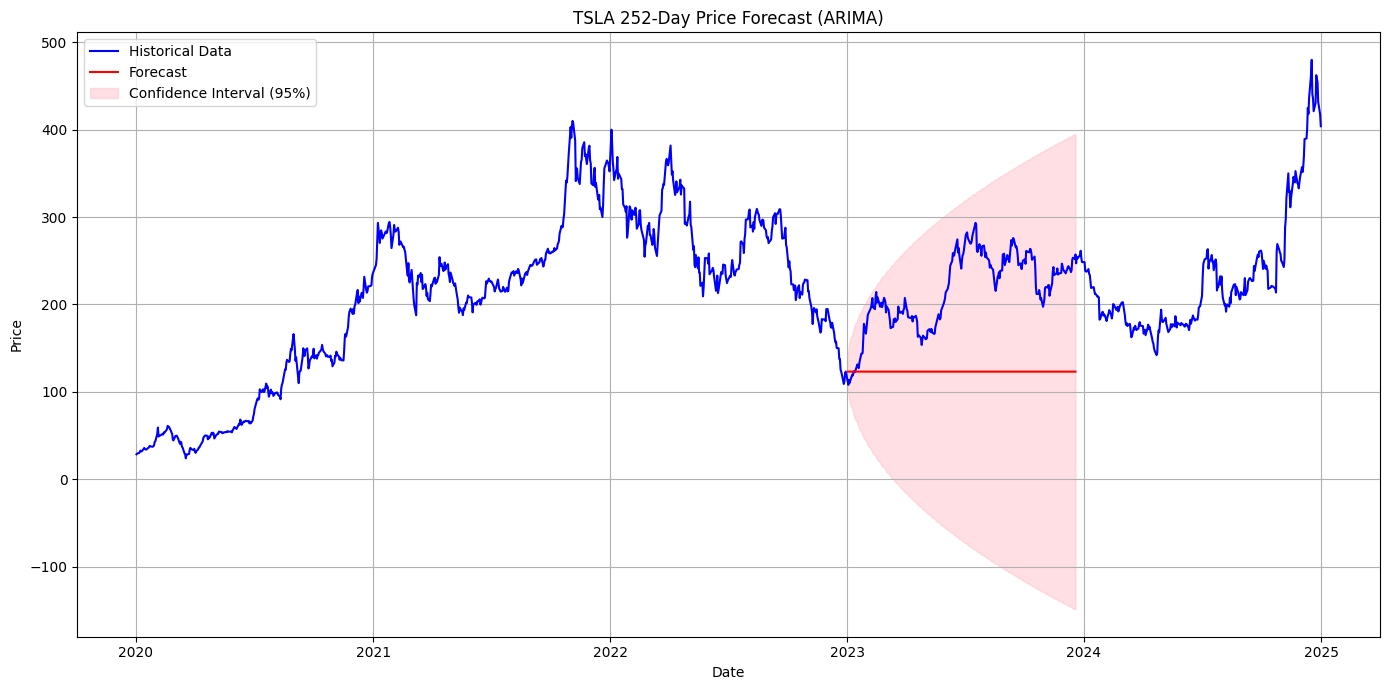

Forecast plot saved to figures/final_forecast.png.



In [8]:
# --- 5. Visualize Results ---
print("--- 5. Visualizing Forecast ---")
plot_forecast_results(
    historical_data=tsla_prices,
    forecast_data=arima_forecast,
    confidence_interval=confidence_interval,
    title=f'TSLA {forecast_steps}-Day Price Forecast (ARIMA)'
)
print("Forecast plot saved to figures/final_forecast.png.\n")

In [9]:
# --- 6. Interpret Results ---
print("--- 6. Interpreting the Forecast ---")
interpret_forecast_results(arima_forecast, confidence_interval)

print("\nTask 3: Forecast Analysis complete.")

--- 6. Interpreting the Forecast ---

--- Forecast Interpretation ---
 Trend Analysis: The forecast shows a long-term downward trend, with an expected change of -0.01% over the forecast period.
 Volatility Analysis: The forecast's confidence interval widens significantly over time. Its width increases by 1446.68%, implying that the reliability and certainty of the prediction decrease as the forecast horizon extends.

 Opportunities: Potential shorting opportunity or a chance to enter the market at a lower price point later.
 Risks: Risk of further declines in value beyond the forecast, and the high uncertainty of the long-term prediction.

Task 3: Forecast Analysis complete.
